Link GSheet: https://docs.google.com/spreadsheets/d/1kd0Cp-aH18CEiuzydak3Q7UKzEp1_935fbygBj-6Jws/edit#gid=0  
Link Kaggle: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists  
Link GDocs: https://docs.google.com/document/d/1-djI-f_ehD-We0fQsHsMiOMuIDLytaW45CChPzbC3MM/edit

In [423]:
# Library

# Basic Statistic
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Statistics
from scipy.stats import normaltest

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve,average_precision_score,plot_precision_recall_curve

# Feature Selection
from sklearn.feature_selection import RFE
from sklearn.metrics import matthews_corrcoef

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Problem Statement

**Context**  
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

0 : Not looking for job change  
1 : Looking for a job change

**1. Background Problem :**

Company want to increase recruitment efficiency based on training

**2. Problem Statement for Machine Learning :**

Company wants to know which candidates are really wants to work for the company based on company training to be hired as data scientists

**3. Action :**

Focusing the recruitment for people who are selected by model ML and suitable with criteria based on analysis

**4. Value / Goals :**

Reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates.

**Metric Evaluation**

Type 1 error : False Positive  
Model predicts that candidate is looking for a job change while actually not  
Consequences: loss of recruitment cost, time and resource

Type 2 error : False Negative  
Model predicts that candidate is not looking for a job change while actually he/she is  
Consequences: loss of potential candidate  

# Data Understanding

In [424]:
#Load Dataset
df = pd.read_csv("aug_train.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


***
* enrollee_id : Unique ID for candidate [numeric]
* city: City code (unknown) [categorical]
* city_ development _index (CDI): Developement index of the city (scaled). Ranks cities according to their Infrastructure, Waste Management, Health, Education, and City Product [numeric]
* gender: Gender of candidate [categorical]
* relevent_experience: Relevant experience of candidate [categorical ordinal]
* enrolled_university: Type of University course enrolled if any [categorical]
* education_level: Education level of candidate [categorical ordinal]
* major_discipline :Education major discipline of candidate [categorical]
* experience: Candidate total experience in years [categorical ordinal]
* company_size: No of employees in current employer's company [categorical ordinal]
* company_type : Type of current employer [categorical]
* lastnewjob: Difference in years between previous job and current job [categorical ordinal]
* training_hours: training hours completed [numeric]
* target: Candidates who decide looking for a job change or not [categorical]

In [425]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [426]:
# Describing non Numerical Data
df.describe(include=object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


# Exploratory Data Analysis (EDA)

In [427]:
# Describing Numerical Data
df.describe().drop(columns=['enrollee_id','target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


* In `city_development_index` (CDI), the mean values is 0.828, median 0.903 and std 0.123. It means that most of the candidates are from well-developed cities.

## Data Distribution

<AxesSubplot:xlabel='training_hours'>

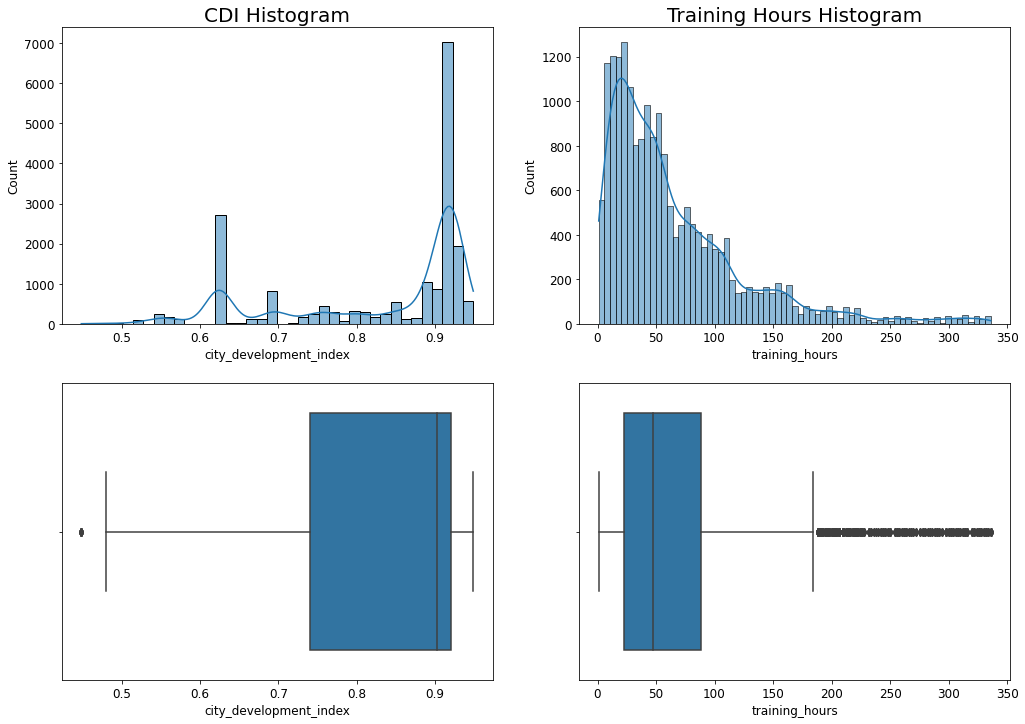

In [428]:
# Distribution of numerical data
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(df['city_development_index'],kde=True)
plt.title('CDI Histogram',fontsize=20)

plt.subplot(222)
sns.histplot(df['training_hours'],kde=True)
plt.title('Training Hours Histogram',fontsize=20)

plt.subplot(223)
sns.boxplot(df['city_development_index'])

plt.subplot(224)
sns.boxplot(df['training_hours'])

In [429]:
# Distribution normality test
numerical_feature = ['city_development_index','training_hours']

for i in numerical_feature:
    stats, pval = normaltest(df[i])
    if pval > 0.05:
        print(i, ': Normal distribution')
    else:
        print(i, ': Not normal distribution')

city_development_index : Not normal distribution
training_hours : Not normal distribution


* `city_development_index` and `training_hours` data are not following normal distribution.

## Data Correlation

### Spearman Correlation

In [430]:
# Correlation of numerical data
df_numerical = df.copy()
df_numerical["experience"] = np.where(df_numerical["experience"]=="<1",1,df_numerical["experience"])#yang kurang dari 1 di ubah ke 1 karena kalo 0 juga sebenernya ada pengalaman
df_numerical["experience"] = np.where(df_numerical["experience"]==">20",21,df_numerical["experience"])
df_numerical["experience"] = df_numerical["experience"].astype(float)
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"]=="never",0,df_numerical["last_new_job"])
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"]==">4",5,df_numerical["last_new_job"])
df_numerical["last_new_job"] = df_numerical["last_new_job"].astype(float)
df_numerical.corr("spearman")

,enrollee_id,city_development_index,experience,last_new_job,training_hours,target
enrollee_id,1.000000,-0.022043,-0.039573,-0.029178,0.006921,0.049377
city_development_index,-0.022043,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,-0.039573,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,-0.029178,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.006921,0.007491,0.003569,0.002959,1.000000,-0.014126
target,0.049377,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


From spearman correlation, last_new_job and experience has medium correlation, while others has weak correlation.  
To determine the predictive between features and target, we will use WOE and IV.

### Weight of Evidence (WOE) and Information Value (IV)
    Information value, Predictive power
    < 0.02, useless for prediction
    0.02 - 0.1, weak predictor
    0.1 - 0.3, medium predictor
    0.3 - 0.5, strong predictor
    > 0.5, suspicious or too good

In [431]:
for i in df.drop(columns=['target','enrollee_id','city','city_development_index','training_hours']).columns:
    df_woe_iv = (pd.crosstab(df[i],df['target'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv=lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    print(df_woe_iv,'\n------------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

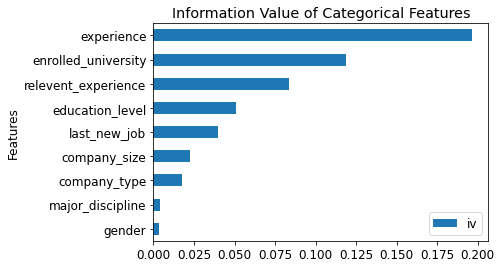

In [432]:
columns_cat = df.drop(columns=['target','enrollee_id','city','city_development_index','training_hours']).columns
iv = []
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i],df['target'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv=lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])
    #     print(df_woe_iv,'\n-------------------------------------------------------')

pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by='iv').plot(kind='barh', title='Information Value of Categorical Features')
plt.legend(loc="lower right")
plt.show()

From the graph above, we can see the order of features based on its predictive power towards target 

## Identify Missing Values

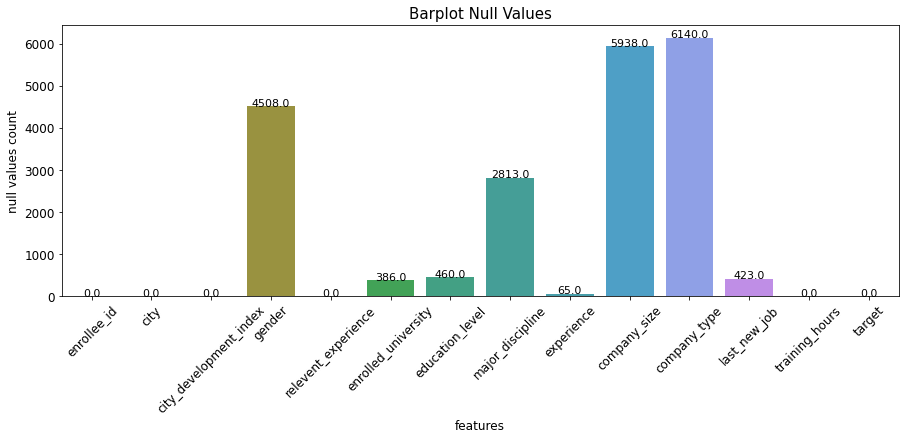

In [433]:
# Missing value percentage per column
null_df = df.isna().sum().reset_index()

ax = plt.figure(figsize=(15,5))

ax = sns.barplot(null_df['index'], null_df[0], palette='husl')
plt.xlabel('features', fontsize=12)
plt.ylabel('null values count', fontsize=12)
plt.xticks(rotation=45)
plt.title("Barplot Null Values",fontsize=15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha='center', color='black', size=11)

plt.show()

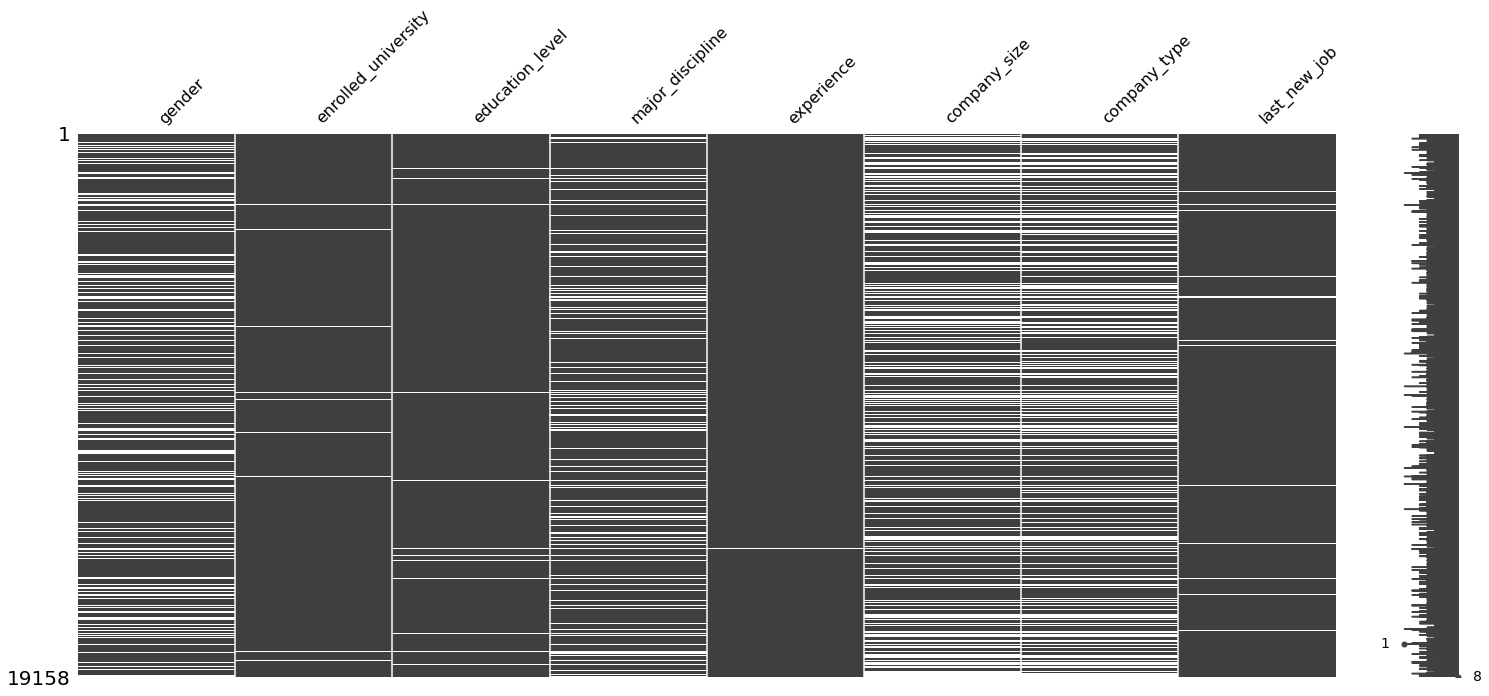

In [434]:
# Generate preview of entries with null values
df_nan = pd.DataFrame(df.isna().sum())

if df.isna().any(axis=None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

## Identify Duplicate Data

In [435]:
# Check any duplicate data
df['enrollee_id'].duplicated().sum() #there is no duplicate data

0

## Identify Data Imbalance

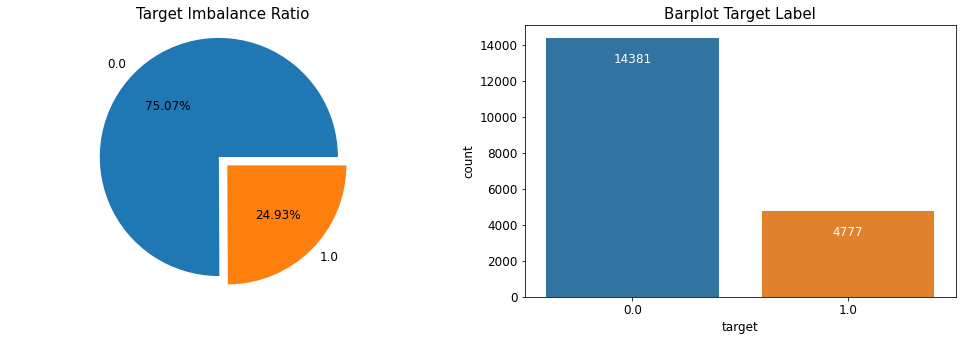

In [436]:
plt.figure(figsize=(17,(100)/20))

plt.subplot(121)
plt.pie(round(df['target'].value_counts()/len(df)*100,2),labels=list(df['target'].value_counts().index),autopct = "%.2f%%",explode = (0,0.1))
plt.axis("equal")
plt.title("Target Imbalance Ratio",size=15)

plt.subplot(122)
ax = sns.countplot(data=df, x='target')
plt.title("Barplot Target Label", fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=12)

Proportion of target is imbalance

# Data Analytics

## Data proportion

### Overall Data Value Counts

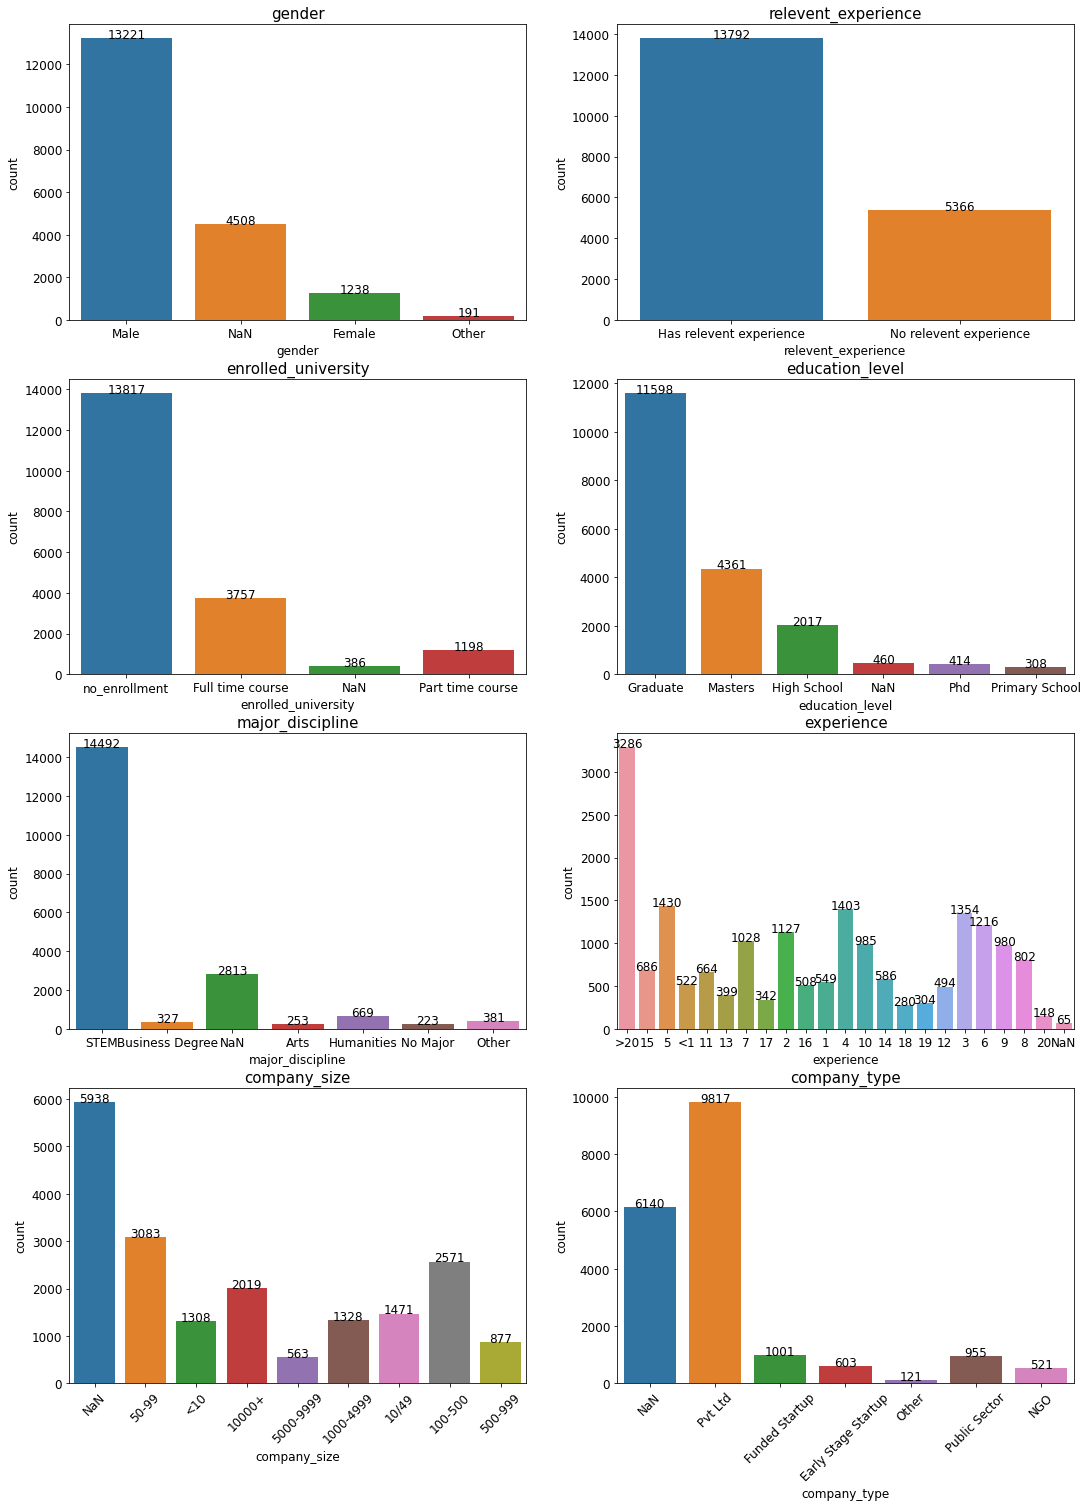

In [437]:
# Visualize data values
plt.figure(figsize=(18,25))
column_list = list(df.columns.values) [3:11]
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data=df.fillna('NaN'), x=i)
    plt.title(i, fontsize=15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=12)
    if A >=7:
        plt.xticks(rotation=45)

From the demography bar plot, we can see that:
* Gender profile is dominated by male candidate
* There are more candidate that has relevant work experience than those who are unexperienced
* Most of the candidate are not enrolling university
* Most of the candidate are graduates
* There is a significant number of STEM graduate than any other discipline 
* There is more candidates that has experience above 20 years prior
* There is more candidates that did not provide their previous company size
* More than half of the candidate worked at Pvt Ltd company type

### Data propotion based on target

In [441]:
transformer_cat = ColumnTransformer([
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['relevent_experience', 'education_level', 'experience', 'company_size', 'last_new_job','city'])
], remainder='passthrough')

x_cat = df[['relevent_experience', 'education_level', 'experience', 'company_size', 'last_new_job','target','city']]

transformer_cat.fit_transform(x_cat)
features = transformer_cat.get_feature_names()

x_cat_ord = pd.DataFrame(transformer_cat.fit_transform(x_cat),columns=features)

df1 = x_cat_ord.copy()
df1['city_development_index range'] = pd.cut(df['city_development_index'],7)
df1['training_hours range'] = pd.cut(df['training_hours'],7)

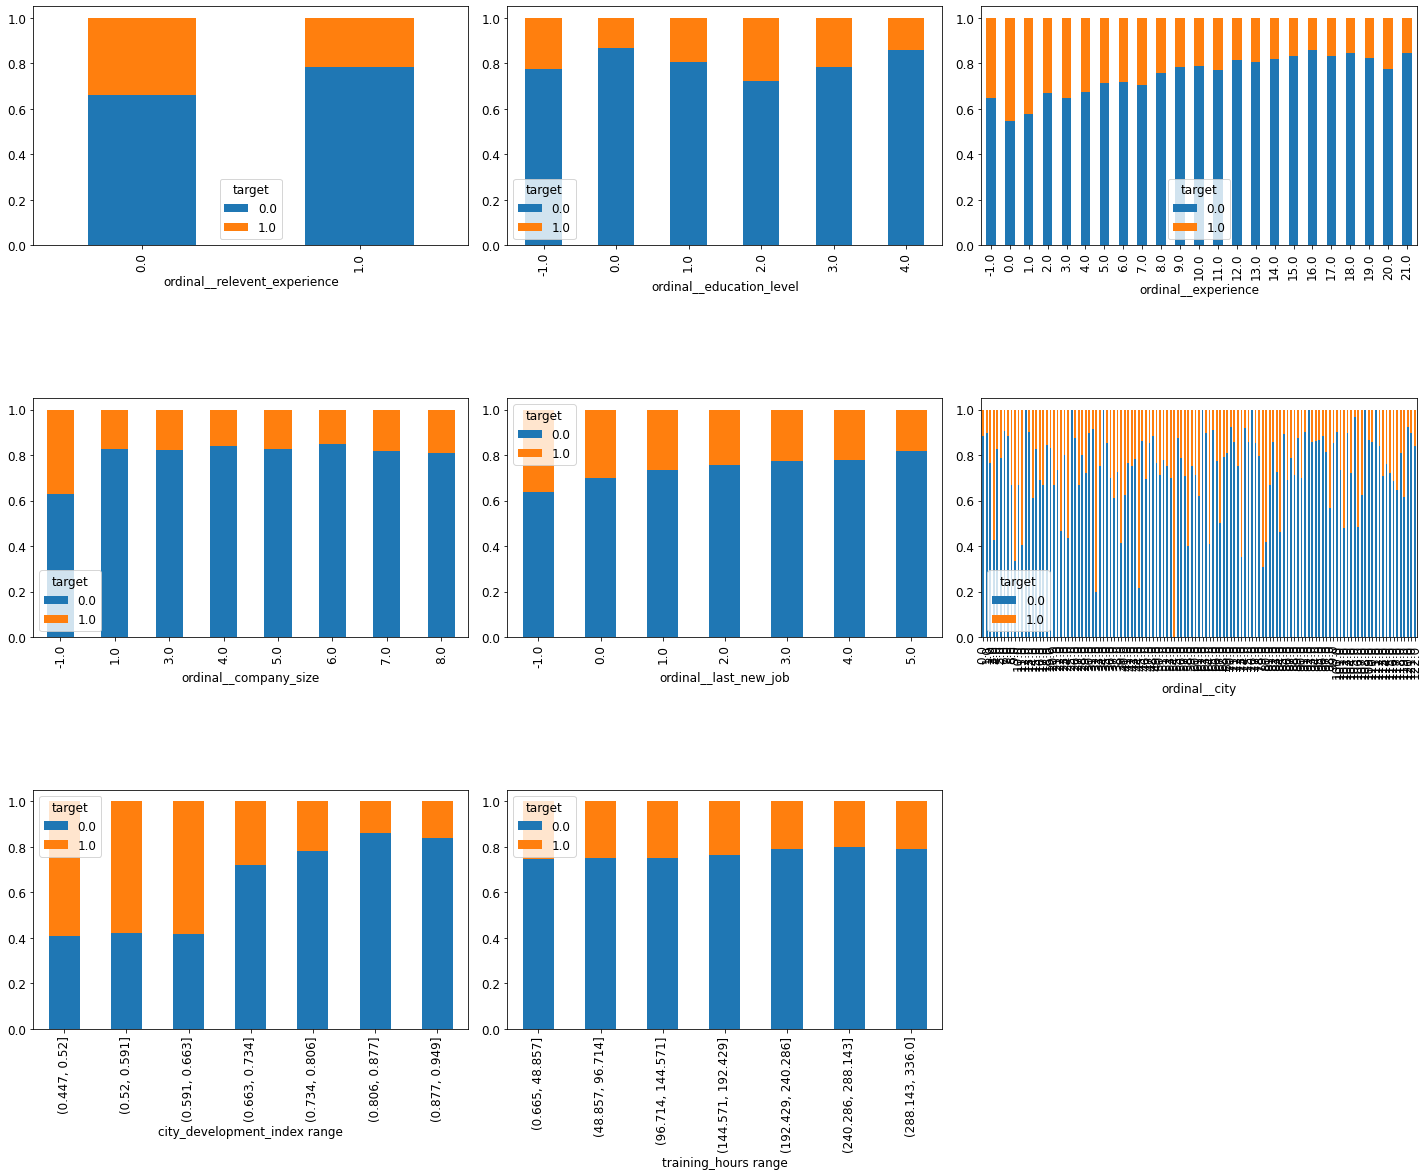

In [445]:
# Proportion of ordinal data
count = 0
fig = plt.figure(figsize=(20,20))

for i in df1.drop(columns='target').columns:
      count +=1
      ax= plt.subplot(4,3,count)
      pd.crosstab(df1[i],df1['target'], normalize=0).plot(kind='bar',stacked=True,ax=ax)
      fig.tight_layout()

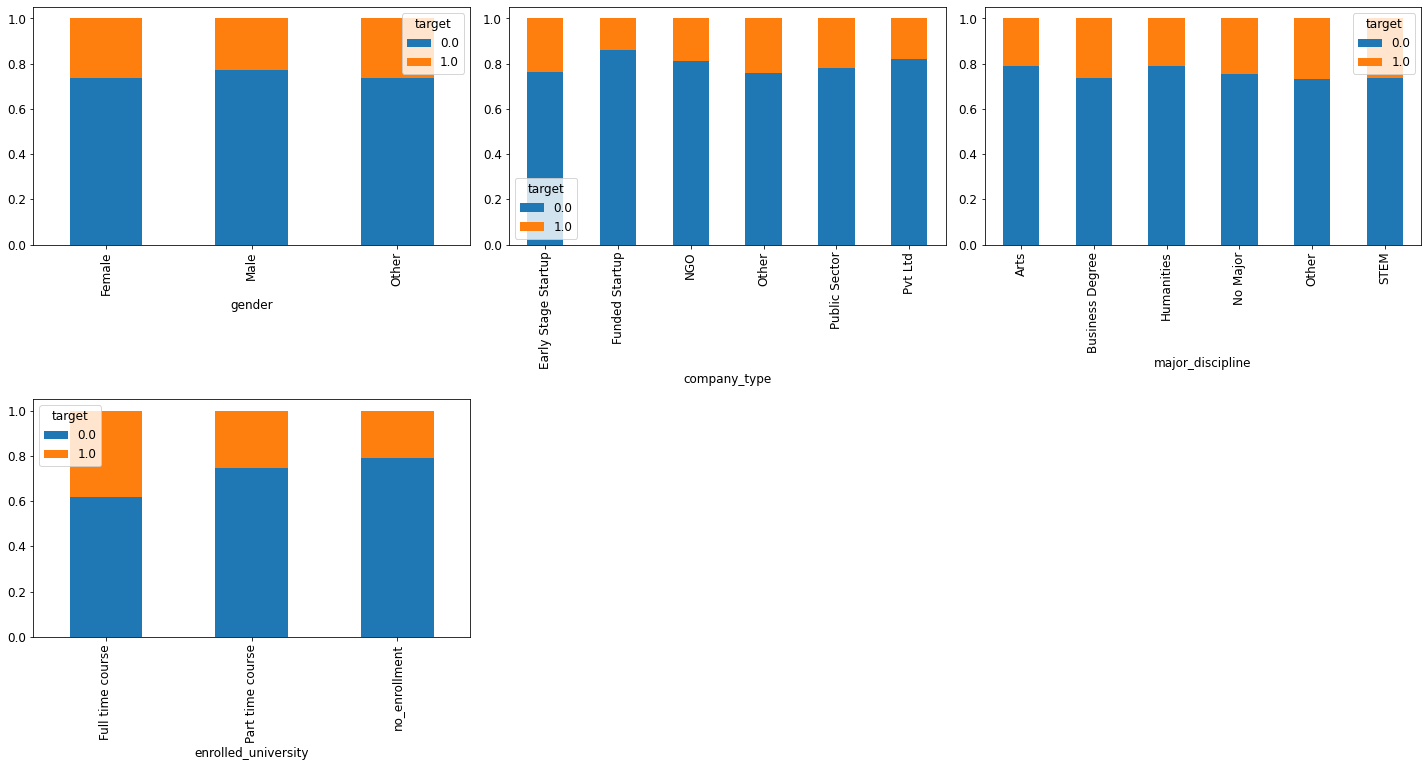

In [443]:
# Proportion of nominal data
count = 0
fig = plt.figure(figsize=(20,20))

for i in df[['gender','company_type','major_discipline','enrolled_university']].columns:
      count +=1
      ax= plt.subplot(4,3,count)
      pd.crosstab(df[i],df['target'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
      fig.tight_layout()


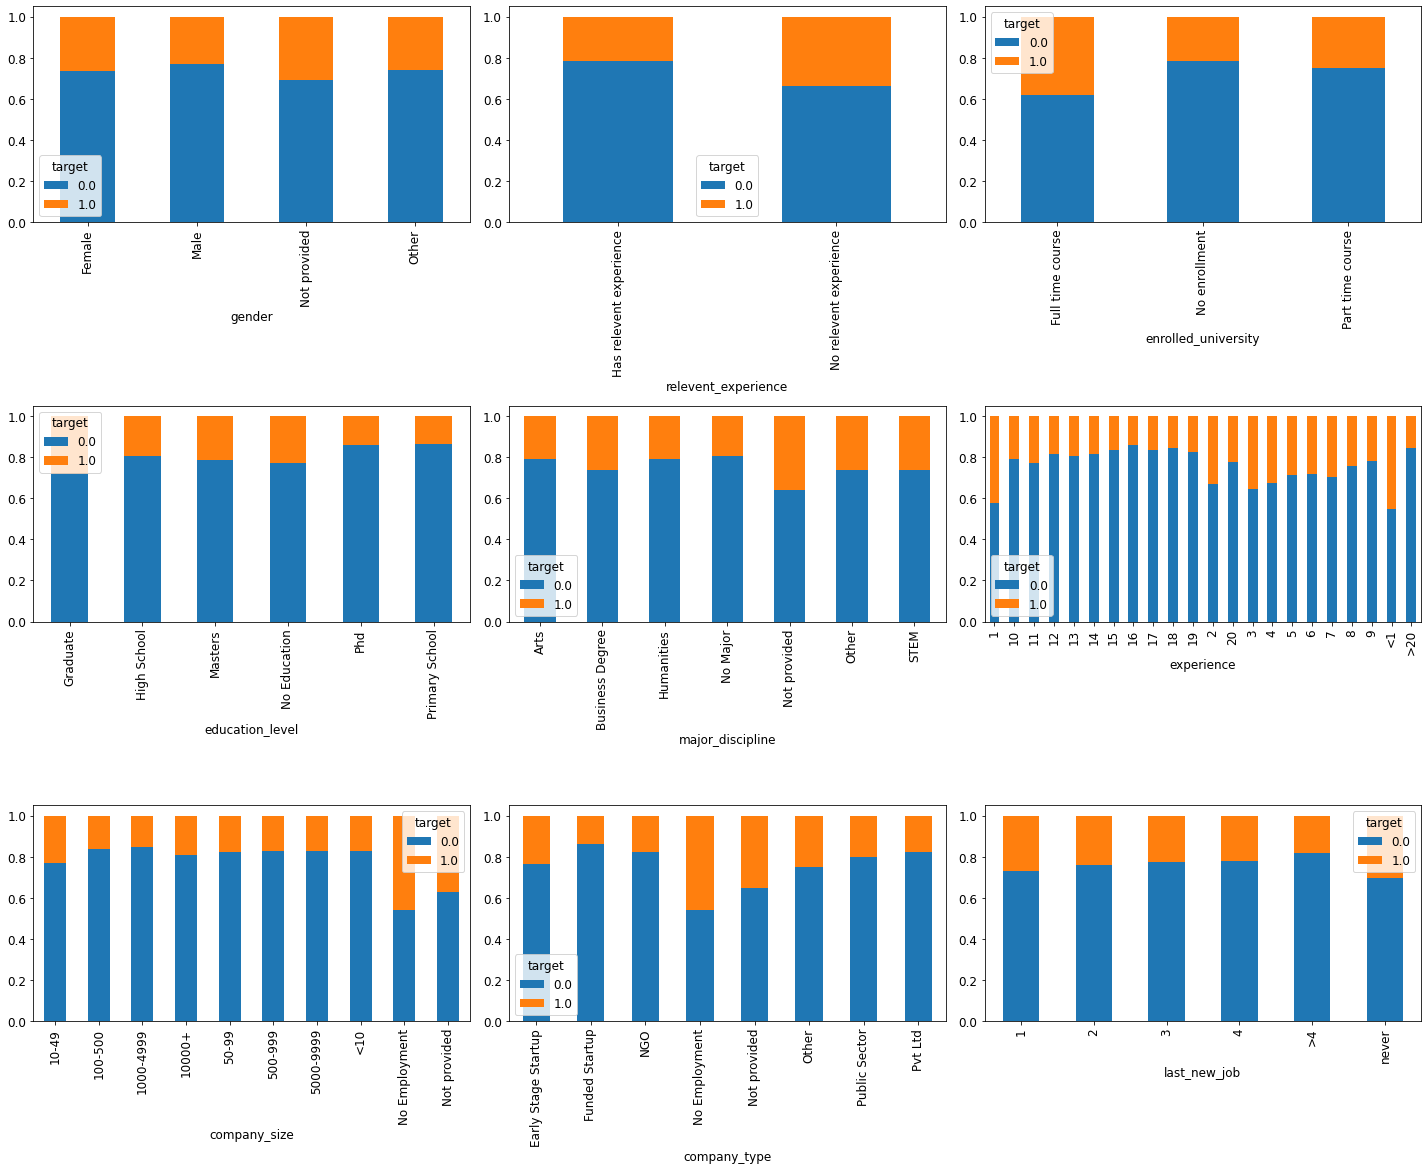

In [390]:
# Proportion of target in features
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['target','enrollee_id','city','city_development_index','training_hours']).columns:
      count +=1
      ax= plt.subplot(4,3,count)
      pd.crosstab(df[i],df['target'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
      fig.tight_layout()

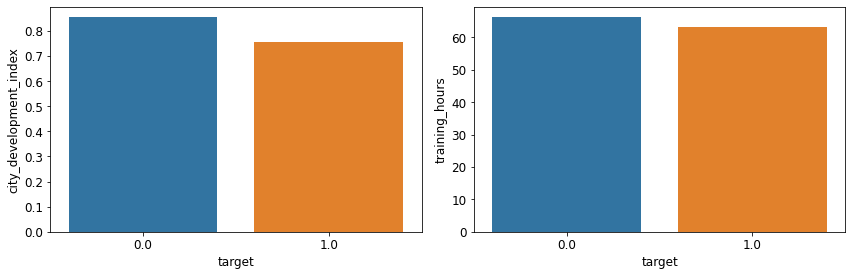

In [261]:
count = 0
fig = plt.figure(figsize=(12,4))

for i in df[['city_development_index','training_hours']].columns:
    count +=1
    ax= plt.subplot(1,2,count)
    sns.barplot(data=df, x='target', y=i, ci=None, estimator=np.mean)
    fig.tight_layout()

From the graph above we can see that in every feature, there is more candidates that are not looking for a job change (`target` 0) than those who are looking for a job change (`target` 1)

In [391]:
# Graphic Objects Plotly (Stacked Bar Chart)
df_target_0 = df[df['target']==0].groupby('city')['enrollee_id'].count().sort_values(ascending=False).reset_index().head(4)
df_target_1 = df[df['target']==1].groupby('city')['enrollee_id'].count().sort_values(ascending=False).reset_index().head(4)

fig=go.Figure()
#create first plot
fig.add_trace(go.Bar(x= df_target_1['city'],
                    y= df_target_1['enrollee_id'],
                    orientation='v',
                    name='Class 1',
                    hoverinfo='all'))

#create second plot
fig.add_trace(go.Bar(x= df_target_0['city'],
                    y= df_target_0['enrollee_id'],
                    orientation='v',
                    name='Class 0',
                    hoverinfo='all'))
fig.update_layout(barmode='stack', width=800, height=400, title='Top 5 Cities')
fig.show()

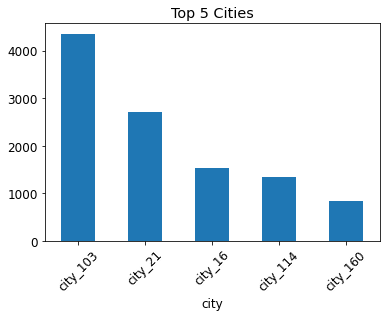

In [263]:
df.groupby(['city'])['enrollee_id'].count().sort_values(ascending=False).head().plot(kind='bar')
plt.title("Top 5 Cities")
plt.xticks(rotation=45)
plt.show()

From the data exploration, we can see that:
* Top 5 `city` where the candidates come from are city_103, city_21, city_16, city_114, city_160, in which city_21 has more class 1 candidates than city_103

<AxesSubplot:xlabel='major_discipline,education_level'>

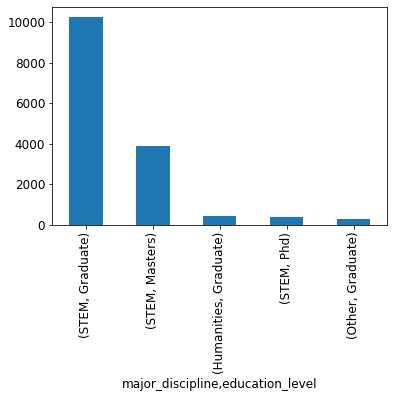

In [264]:
# Showing the candidates' education background
df.groupby(['major_discipline'])['education_level'].value_counts(dropna=False).sort_values(ascending=False).head().plot(kind='bar')

From the bar graph above we can see that most of the candidates took STEM `major_discipline` at Graduate and Master `education_level`. This information can be used for HR Recruitment department to target talents for data science in the future.

# Preprocessing

## Fill Missing Values

### Major discipline

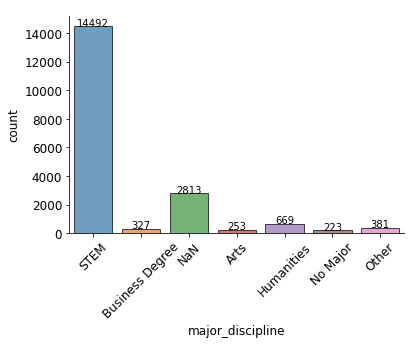

In [266]:
sns.countplot(data=df.fillna('NaN'), x='major_discipline', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=10)
plt.show()

In [267]:
# Evaluate No Major in major_discipline
df[df['major_discipline']=='No Major']['education_level'].value_counts(dropna=False)

Graduate    194
Masters      29
Name: education_level, dtype: int64

Candidates who entry `major_discipline` as `No Major` are those who acquired `Graduate` and `Masters` `education_level`. We assume their major is not on the list. Thus, we will change their `major_discipline` to `Other`major.

In [268]:
nan_index = (df[(df['major_discipline']=='No Major') & ((df['education_level']=='Graduate') | (df['education_level']=='Masters'))]).index
df['major_discipline'][nan_index]='Other'

In [269]:
df['major_discipline'].value_counts(dropna=False)

STEM               14492
NaN                 2813
Humanities           669
Other                604
Business Degree      327
Arts                 253
Name: major_discipline, dtype: int64

`No Major` has been successfully changed to `Other`

In [270]:
# Missing values of major discipline
print('Current missing value:', df['major_discipline'].isna().sum())
df[df['major_discipline'].isna()]['education_level'].value_counts(dropna=False)

Current missing value: 2813


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

All of candidate with `high school` and `primary school` `education_level` entry `NaN` values for `major_discipline`, thus we will fill their `major_discipline` to `No major`

In [271]:
nan_index=(df[(df['major_discipline'].isna()) & ((df['education_level']=='High School') | (df['education_level']=='Primary School'))]).index
df['major_discipline'][nan_index]='No Major'

In [272]:
df['major_discipline'].value_counts(dropna=False)

STEM               14492
No Major            2325
Humanities           669
Other                604
NaN                  488
Business Degree      327
Arts                 253
Name: major_discipline, dtype: int64

`high school` and `primary school` graduates successfully changed to `No Major`

In [273]:
# The implication of education level to major discipline entry
print('Current missing value:', df['major_discipline'].isna().sum())
df[df['major_discipline'].isna()]['education_level'].value_counts(dropna=False)

Current missing value: 488


NaN         460
Graduate     22
Masters       6
Name: education_level, dtype: int64

From 488 NaN values in `major_discipline`, 460 of them has `NaN` values in `education_level`. We assume that these candidates do not have formal education. Thus, we will consider their `major_discipline` as `No Major` too.

In [274]:
nan_index=(df[(df['major_discipline'].isna()) & (df['education_level'].isna())]).index
df['major_discipline'][nan_index]='No Major'

In [275]:
df['major_discipline'].value_counts(dropna=False)

STEM               14492
No Major            2785
Humanities           669
Other                604
Business Degree      327
Arts                 253
NaN                   28
Name: major_discipline, dtype: int64

`NaN` `education_level` entry successfully changed to `No Major`.  

Now we left with 28 `NaN` values in `major_discipline` that come from candidates who obtained `Graduate` and `Masters`. We suspect there is an error in data entry process.

### Education level

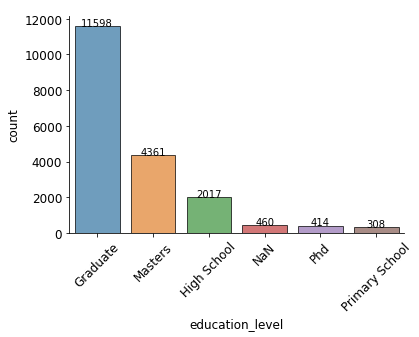

In [276]:
sns.countplot(data=df.fillna('NaN'), x='education_level', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=10)
plt.show()

As processed in `major_discipline`, initially all `NaN` values in `education_level` also has `NaN` values in `major_discipline`. So it belongs to those who don't have formal education. Thus, we will change the label as `No Education`.

In [277]:
print('Current missing value:', df['education_level'].isna().sum())
df['education_level'] = df['education_level'].fillna('No Education')
df['education_level'].value_counts(dropna=False)

Current missing value: 460


Graduate          11598
Masters            4361
High School        2017
No Education        460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

`NaN` values successfully changed to `No Education`

### Enrolled University

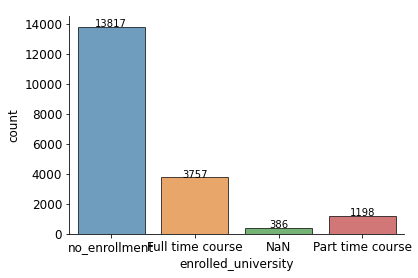

In [278]:
sns.countplot(data=df.fillna('NaN'), x='enrolled_university', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=10)
plt.show()

In [279]:
df[df['enrolled_university'].isna()]['education_level'].value_counts(dropna=False)

Graduate          171
No Education      100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

Candidate who has `No Education` and `Primary School` `education_level` are not qualified to enroll university. So we will fill their `NaN` entry in `enrolled_university` to `no_enrollment`.

In [280]:
nan_index=(df[(df['enrolled_university'].isna()) & ((df['education_level']=='No Education')|(df['education_level']=='Primary School'))]).index
df['enrolled_university'][nan_index]='no_enrollment'

In [281]:
print('Current missing value:', df['enrolled_university'].isna().sum())
df[df['enrolled_university'].isna()]['education_level'].value_counts(dropna=False)

Current missing value: 277


Graduate       171
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

`No Education` and `Primary School` candidate successfully changed to `no_enrollment`.

### Company Size/Company Type

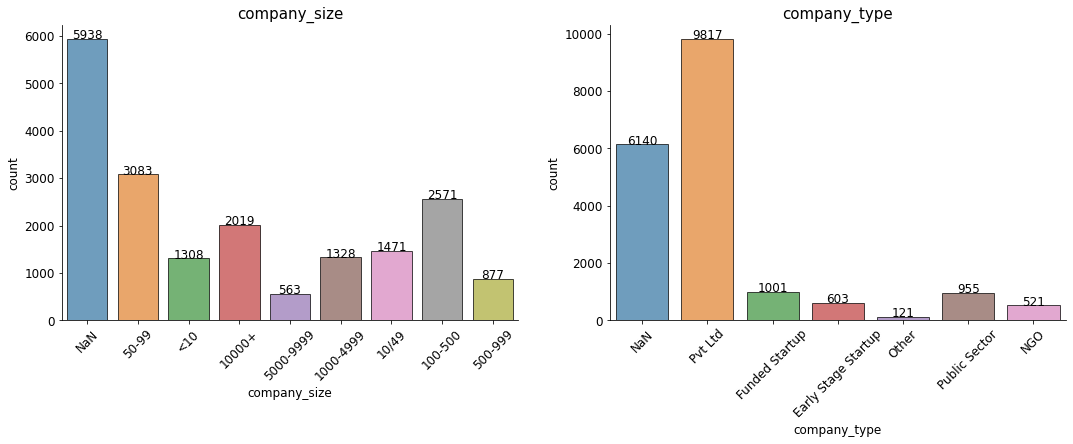

In [282]:
plt.figure(figsize=(18,25))
column_list = ['company_size','company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data=df.fillna('NaN'), x=i, alpha=0.7, edgecolor='black')
    sns.despine()
    plt.title(i, fontsize=15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=12)
    if A >=0:
        plt.xticks(rotation=45)

In [394]:
df['company_size'].value_counts()

Not provided     3859
50-99            3039
100-500          2546
No Employment    2226
10000+           2004
10-49            1454
1000-4999        1318
<10              1295
500-999           867
5000-9999         550
Name: company_size, dtype: int64

In [283]:
df[(df['company_size'].isna()) & (df['company_type'].isna())]['enrolled_university'].value_counts(dropna=False)

no_enrollment       3102
Full time course    1846
Part time course     288
NaN                  124
Name: enrolled_university, dtype: int64

Candidates enrolling `Full time course` in `enrolled_university` are not likely to work for a company. So we will set their `NaN`entry in `company_size` and `company_type` to `No Employment`.

In [284]:
nan_index=(df[(df['company_size'].isna()) & (df['company_type'].isna()) & (df['enrolled_university']=='Full time course')]).index
df['company_size'][nan_index]='No Employment'
df['company_type'][nan_index]='No Employment'

In [285]:
print('Current missing value company_size:', df['company_size'].isna().sum())
print('Current missing value company_type:', df['company_type'].isna().sum())
df[(df['company_size'].isna()) & (df['company_type'].isna())]['enrolled_university'].value_counts(dropna=False)

Current missing value company_size: 4092
Current missing value company_type: 4294


no_enrollment       3102
Part time course     288
NaN                  124
Name: enrolled_university, dtype: int64

`Full time course` candidate successfully changed to `No Employment`.

In [286]:
df[(df['company_size'].isna()) | (df['company_type'].isna())]['enrolled_university'].value_counts(dropna=False)

no_enrollment       3956
Full time course     380
Part time course     376
NaN                  160
Name: enrolled_university, dtype: int64

Some candidates enrolling `Full time course` in `enrolled_university` entry `NaN` values either in `company_size` or `company_type`. We assume that they are not likely to work for a company too, so we will fill the missing value with `No Employment`.

In [287]:
nan_index=(df[((df['company_size'].isna()) | (df['company_type'].isna())) & (df['enrolled_university']=='Full time course')]).index
df['company_size'][nan_index]='No Employment'
df['company_type'][nan_index]='No Employment'

In [288]:
print('Current missing value company_size:', df['company_size'].isna().sum())
print('Current missing value company_type:', df['company_type'].isna().sum())
df[(df['company_size'].isna()) | (df['company_type'].isna())]['enrolled_university'].value_counts(dropna=False)

Current missing value company_size: 3859
Current missing value company_type: 4147


no_enrollment       3956
Part time course     376
NaN                  160
Name: enrolled_university, dtype: int64

`Full time course` candidate successfully changed to `No Employment`.

In [289]:
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,No Employment,No Employment,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,No Major,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [290]:
# Evaluate if city and city_development_index is paired
df_city = pd.DataFrame()
df_city['city'] = df['city'].copy()
df_city['CDI']  = df['city_development_index'].copy()
df_city["median"] = df_city['city'].map(df_city.groupby("city")['CDI'].median().to_dict())
df_city[df_city['CDI']!=df_city['median']]

,city,CDI,median


In [291]:
# Identify shared information between city and city_development_index
print('N unique data in city_development_index:',df['city_development_index'].nunique())
print('N unique data in city:',df['city'].nunique())

N unique data in city_development_index: 93
N unique data in city: 123


We can see that there are some cities that share same CDI value

In [292]:
df[df['city_development_index']==0.824]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


In [293]:
df['city_development_index'].unique()

array([0.92 , 0.776, 0.624, 0.789, 0.767, 0.764, 0.762, 0.913, 0.926,
       0.827, 0.843, 0.804, 0.855, 0.887, 0.91 , 0.884, 0.924, 0.666,
       0.558, 0.923, 0.794, 0.754, 0.939, 0.55 , 0.865, 0.698, 0.893,
       0.796, 0.866, 0.682, 0.802, 0.579, 0.878, 0.897, 0.949, 0.925,
       0.896, 0.836, 0.693, 0.769, 0.775, 0.903, 0.555, 0.727, 0.64 ,
       0.516, 0.743, 0.899, 0.915, 0.689, 0.895, 0.89 , 0.847, 0.527,
       0.766, 0.738, 0.647, 0.795, 0.74 , 0.701, 0.493, 0.84 , 0.691,
       0.735, 0.742, 0.479, 0.722, 0.921, 0.848, 0.856, 0.898, 0.83 ,
       0.73 , 0.68 , 0.725, 0.556, 0.448, 0.763, 0.745, 0.645, 0.788,
       0.78 , 0.512, 0.739, 0.563, 0.518, 0.824, 0.487, 0.649, 0.781,
       0.625, 0.807, 0.664])

In [417]:
df['city_development_index'].mean()

0.8288480008351684

In [294]:
df[df['city_development_index']==0.735]['company_type'].value_counts(dropna=False)

Pvt Ltd                2
No Employment          2
Public Sector          2
Early Stage Startup    1
NaN                    1
Name: company_type, dtype: int64

In [295]:
df[df['city']=='city_81']['company_type'].value_counts(dropna=False)

Pvt Ltd          2
Public Sector    2
No Employment    1
NGO              1
NaN              1
Name: company_type, dtype: int64

In [296]:
CDI = df['city_development_index'].unique()
city = df['city'].unique()
type_company = []
type_company_freq = []
size_company = []
size_company_freq = []


for i in city:
    type_company.append(df[df['city']==i]['company_type'].describe().loc['top'])
    type_company_freq.append(df[df['city']==i]['company_type'].describe().loc['freq'])
    size_company.append(df[df['city']==i]['company_size'].describe().loc['top'])
    size_company_freq.append(df[df['city']==i]['company_size'].describe().loc['freq'])

df_city = pd.DataFrame({'city':df['city'].unique(),
             'top company_type':type_company,
             'type_freq':type_company_freq,
             'top company_size':size_company,
             'size_freq':size_company_freq}).set_index('city')
df_city[df_city['top company_type']!='Pvt Ltd']

,top company_type,type_freq,top company_size,size_freq
city,,,,
city_48,No Employment,3.0,No Employment,3.0
city_126,No Employment,5.0,No Employment,5.0
city_127,No Employment,4.0,No Employment,4.0
city_111,NGO,1.0,<10,1.0
city_42,No Employment,5.0,No Employment,5.0
city_107,No Employment,3.0,No Employment,3.0
city_18,Early Stage Startup,1.0,<10,2.0
city_166,Early Stage Startup,1.0,<10,1.0
city_8,No Employment,1.0,No Employment,1.0


In [297]:
df[df['city_development_index']==0.92]['company_type'].describe()

count        4031
unique          7
top       Pvt Ltd
freq         2569
Name: company_type, dtype: object

In [298]:
df[df['city_development_index']==0.92][['company_type','company_size']].value_counts()

company_type         company_size 
Pvt Ltd              10000+           651
                     100-500          507
                     50-99            460
No Employment        No Employment    434
Pvt Ltd              1000-4999        290
                     10/49            164
                     500-999          158
Funded Startup       50-99            148
Pvt Ltd              5000-9999        142
                     <10              128
Funded Startup       100-500           96
Public Sector        1000-4999         72
                     10000+            68
NGO                  100-500           66
Funded Startup       10/49             54
Early Stage Startup  <10               47
Public Sector        100-500           40
NGO                  1000-4999         40
Public Sector        50-99             38
Early Stage Startup  10/49             31
Funded Startup       <10               29
NGO                  50-99             28
Public Sector        500-999           26

### Last New Job

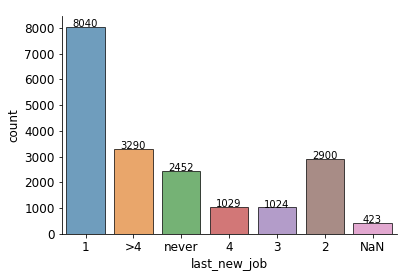

In [299]:
sns.countplot(data=df.fillna('NaN'), x='last_new_job', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=10)
plt.show()

In [300]:
df[df['last_new_job'].isna()]['experience'].value_counts(dropna=False)

3      58
4      53
<1     38
2      37
5      34
>20    33
1      32
NaN    24
6      22
9      15
7      15
8      12
16      8
10      8
12      6
11      5
13      5
19      5
18      4
14      4
15      2
17      2
20      1
Name: experience, dtype: int64

Candidates having `<1` year of `experience` are not likely to have `last_new_job`. So we will fill the `NaN` values with `never`

In [301]:
df[(df['last_new_job'].isna()) & (df['experience']=='<1')]['enrolled_university'].value_counts(dropna=False)

no_enrollment       16
Full time course    15
NaN                  4
Part time course     3
Name: enrolled_university, dtype: int64

Candidates having `<1` year of `experience` and currenty `enrolled_university` at `Full time course` are not likely to have `last_new_job`. So we will fill the `NaN` values with `never`

In [302]:
nan_index=(df[(df['last_new_job'].isna()) & ((df['experience']=='<1') & (df['enrolled_university']=='Full time course'))]).index
df['last_new_job'][nan_index]='never'

In [303]:
print('Current missing value:', df['last_new_job'].isna().sum())
df[(df['last_new_job'].isna()) & (df['experience']=='<1')]['enrolled_university'].value_counts(dropna=False)

Current missing value: 408


no_enrollment       16
NaN                  4
Part time course     3
Name: enrolled_university, dtype: int64

`<1` year of `experience` and `Full time course` candidates successfully changed to `never`.

In [304]:
df[(df['last_new_job'].isna())&(df['experience']=='<1')]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1200,17357,city_160,0.920,NaN,No relevent experience,no_enrollment,Primary School,No Major,<1,NaN,NaN,NaN,166,0.0
1492,12362,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,<1,10000+,Pvt Ltd,NaN,28,1.0
2200,2731,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,<1,10000+,Pvt Ltd,NaN,38,1.0
5786,1596,city_103,0.920,NaN,No relevent experience,no_enrollment,Graduate,Other,<1,50-99,Pvt Ltd,NaN,180,0.0
5886,12496,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,<1,10/49,NaN,NaN,12,1.0
6112,19433,city_21,0.624,Female,Has relevent experience,NaN,Graduate,STEM,<1,500-999,NaN,NaN,79,1.0
6690,25046,city_21,0.624,NaN,Has relevent experience,NaN,Graduate,STEM,<1,10/49,NaN,NaN,8,1.0
6991,20777,city_143,0.740,NaN,No relevent experience,no_enrollment,Graduate,STEM,<1,NaN,NaN,NaN,88,1.0
7621,18861,city_24,0.698,NaN,No relevent experience,no_enrollment,No Education,No Major,<1,NaN,NaN,NaN,17,0.0
7847,18397,city_90,0.698,NaN,No relevent experience,NaN,Graduate,STEM,<1,<10,NaN,NaN,55,1.0


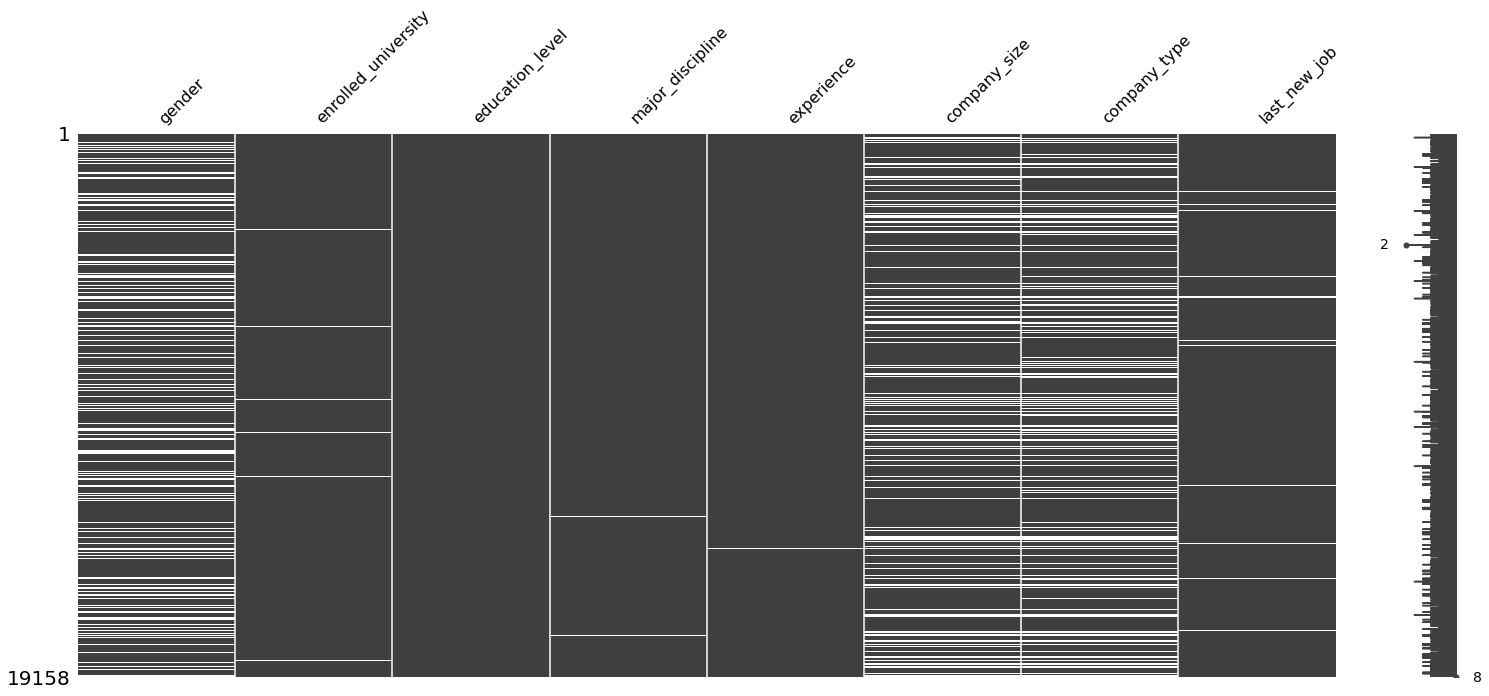

In [305]:
# Generate preview of entries with null values after evaluation
if df.isna().any(axis=None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

In [306]:
imputer_modus=SimpleImputer(strategy="most_frequent")
df[["enrolled_university","education_level","experience","last_new_job"]]=imputer_modus.fit_transform(df[["enrolled_university","education_level","experience","last_new_job"]])

imputer_cons=SimpleImputer(strategy="constant",fill_value="Not provided")
df[["gender","major_discipline","company_size","company_type"]]=imputer_cons.fit_transform(df[["gender","major_discipline","company_size","company_type"]])

## Data Inconsistency

In [307]:
# Make data more neat to read
df['enrolled_university'] = df['enrolled_university'].replace('no_enrollment', 'No enrollment')

In [308]:
# Correctiong punctuation
df['company_size'] = df['company_size'].replace('10/49','10-49')

## Feature Engineering

**Encoding**  
* One hot encoder : gender, company_type, major_discipline, enrolled_university
* Ordinal encoder : relevent_experience, education_level, experience, company_size, last_new_job   

In [343]:
# Ordinal Mapping Dictionary

le = LabelEncoder()
le.fit(df['city'])

ordinal_mapping = [
    {'col':'relevent_experience',
    'mapping':{
        'Has relevent experience': 1,
        'No relevent experience': 0
    }},
    {'col':'education_level',
    'mapping':{
        'Primary School' : 0,
        'Graduate'       : 2,
        'Masters'        : 3, 
        'High School'    : 1, 
        'Phd'            : 4
    }},
    {'col':'experience',
    'mapping':{
        '<1'      :    0,
        '1'       :    1, 
        '2'       :    2, 
        '3'       :    3, 
        '4'       :    4, 
        '5'       :    5,
        '6'       :    6,
        '7'       :    7,
        '8'       :    8, 
        '9'       :    9, 
        '10'      :    10, 
        '11'      :    11,
        '12'      :    12,
        '13'      :    13, 
        '14'      :    14, 
        '15'      :    15, 
        '16'      :    16,
        '17'      :    17,
        '18'      :    18,
        '19'      :    19, 
        '20'      :    20, 
        '>20'     :    21
    }},
    {'col':'company_size',
    'mapping':{
        'Not provided' : 0,
        '<10'          : 1,
        '10-49'        : 2, 
        '50-99'        : 3,
        '100-500'      : 4, 
        '500-999'      : 5, 
        '1000-4999'    : 6, 
        '5000-9999'    : 7,
        '10000+'       : 8      
    }},
    {'col':'last_new_job',
    'mapping':{
        'never'        :    0,
        '1'            :    1, 
        '2'            :    2, 
        '3'            :    3, 
        '4'            :    4, 
        '>4'           :    5
    }},
    {'col':'city',
    'mapping':dict(zip(le.classes_, range(len(le.classes_))))
    }
]

In [349]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['gender', 'company_type', 'major_discipline', 'enrolled_university']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['city','relevent_experience', 'education_level', 'experience', 'company_size', 'last_new_job'])
], remainder='passthrough')

In [356]:
transformer_cat = ColumnTransformer([
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['city','relevent_experience', 'education_level', 'experience', 'company_size', 'last_new_job'])
], remainder='passthrough')

# Model Selection

We will try several models:
* Logistic Regression
* KNN 
* Decision Tree
* Random Forest
* XGBoost
* Catboost

feature : 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'  
target : 'target'

In [357]:
x = df.drop(columns=['enrollee_id','target'])
y = df['target']

## Splitting Data

In [358]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=.2,random_state=2020)

## Model Benchmarking

In [395]:
# Model variables
logreg = LogisticRegression(max_iter=100, random_state=2020)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=3, random_state=2020)
rf = RandomForestClassifier(random_state=2020)
xgb = XGBClassifier()

# Catboost model
x_train_ord = pd.DataFrame(transformer_cat.fit_transform(x_train),columns=transformer_cat.get_feature_names())
x_test_ord = pd.DataFrame(transformer_cat.fit_transform(x_test),columns=transformer_cat.get_feature_names())

CAT_FEATURES = ['gender', 'company_type', 'major_discipline', 'enrolled_university'] #list of your categorical features
catboost_model = CatBoostClassifier(n_estimators=100,
                                   cat_features = CAT_FEATURES,verbose=False)

In [397]:
catboost_model.fit(x_train_ord,y_train)
catboost_model.predict(x_test_ord)

array([0., 1., 0., ..., 0., 0., 0.])

### Model Benchmarking: Data train

In [398]:
models = [logreg,knn,dt,rf,xgb,'catboost_model']
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    if i == 'catboost_model':
        model_cv=cross_val_score(catboost_model,x_train_ord,y_train,cv=skfold,scoring='roc_auc')
    else:
        estimator=Pipeline([
            ('preprocess',transformer),
            ('model',i)])
        model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','Catboost'],'mean':rata,'sdev':std}).set_index('model').sort_values(by='mean',ascending=False)

[14:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,mean,sdev
model,,
Catboost,0.801876,0.006693
Random Forest,0.788884,0.005435
XGBoost,0.786871,0.006571
Decision Tree,0.776202,0.005953
Logistic Regression,0.739498,0.008078
KNN,0.683938,0.006105


### Model Benchmarking: Data test

In [401]:
models = [logreg,knn,dt,rf,xgb,'catboost_model']
score = []

def y_pred_func(i):
    if i == 'catboost_model':
        estimator = catboost_model
        x_train2,x_test2 = x_train_ord,x_test_ord
    else:
        estimator=Pipeline([
            ('preprocess',transformer),
            ('model',i)])
        x_train2,x_test2 = x_train,x_test
    
    estimator.fit(x_train2,y_train)
    return(estimator,estimator.predict(x_test2),x_test2)

for i in models:
    estimator,y_pred,x_test2 = y_pred_func(i)
    if i != 'catboost_model':
        y_predict_proba = estimator.predict_proba(x_test2)[:,1]
    else:
        y_predict_proba = y_pred
    score.append(roc_auc_score(y_test,y_predict_proba))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','Catboost'],
             'roc auc score':score}).set_index('model').sort_values(by='roc auc score',ascending=False)

[14:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,roc auc score
model,
XGBoost,0.786522
Random Forest,0.780286
Decision Tree,0.774033
Logistic Regression,0.741700
Catboost,0.702015
KNN,0.691039


In [402]:
models = [logreg,knn,dt,rf,xgb,'catboost_model']
score = []

for i in models:
    estimator,y_pred,x_test2 = y_pred_func(i)
    if i == 'catboost_model':
        y_pred = np.where(y_pred>0.5,1,0) 
    score.append(matthews_corrcoef(y_test, y_pred))

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','Catboost'],
         'MCC':score}).set_index('model').sort_values(by='MCC',ascending=False)

[14:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,MCC
model,
Catboost,0.415515
XGBoost,0.387248
Random Forest,0.365830
Decision Tree,0.349853
KNN,0.257243
Logistic Regression,0.200812


### Performance Comparison: Data train & Data test

In [403]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_table(y_test,y_pred):
    cf = confusion_matrix(y_test, y_pred)
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf.flatten()]

    names =  ['TN', 'FP', 'FN','TP']
    perc = ["{0:.2%}".format(value) for value in
                         cf.flatten()/np.sum(cf)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(names, perc, group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    
    return cf,labels

[14:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


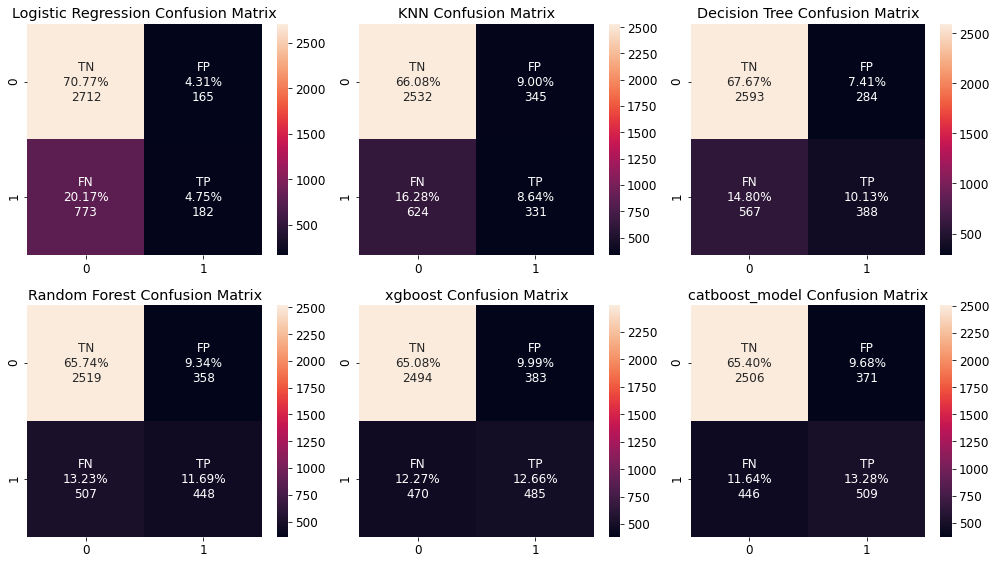

In [404]:
count = 0
models = [logreg,knn,dt,rf,xgb,'catboost_model']
fig = plt.figure(figsize=(14,8))

for i,j in zip(models,['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest','xgboost','catboost_model']):
    
    estimator,y_pred,x_test2 = y_pred_func(i)
    if i == 'catboost_model':
        y_pred = np.where(y_pred>0.5,1,0) 

    count += 1
    cf,labels = confusion_matrix_table(y_test,y_pred)
    ax= plt.subplot(2,3,count)

    plt.rcParams.update({'font.size': 12})
    sns.heatmap(cf, annot=labels, fmt='').set_title(f"{j} Confusion Matrix")
    fig.tight_layout()

In [405]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest','XGBoost','Catboost'],
              'Mean Score ROC Data Train':rata,
             'MCC Score Data Test':score}).set_index('model').sort_values(by='Mean Score ROC Data Train',ascending=False)

,Mean Score ROC Data Train,MCC Score Data Test
model,,
Catboost,0.801876,0.415515
Random Forest,0.788884,0.365830
XGBoost,0.786871,0.387248
Decision Tree,0.776202,0.349853
Logistic Regression,0.739498,0.200812
KNN,0.683938,0.257243


**Catboost gives best performances based on Data train and Data test**

In [406]:
catboost_model.fit(x_train_ord, y_train, 
                   eval_set = (x_test_ord, y_test),
                   use_best_model = True,
                   verbose=False)

y_pred = catboost_model.predict(x_test_ord)
y_pred = np.where(y_pred>0.5,1,0)
roc_auc_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      2877
         1.0       0.58      0.56      0.57       955

    accuracy                           0.79      3832
   macro avg       0.72      0.71      0.72      3832
weighted avg       0.79      0.79      0.79      3832



## Imbalance data handling

In [409]:
from sklearn.utils.class_weight import compute_class_weight

In [416]:
x_train_ord = pd.DataFrame(transformer_cat.fit_transform(x_train),columns=transformer_cat.get_feature_names())
x_test_ord = pd.DataFrame(transformer_cat.fit_transform(x_test),columns=transformer_cat.get_feature_names())

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

CAT_FEATURES = ['gender', 'company_type', 'major_discipline', 'enrolled_university'] #list of your categorical features
catboost_model = CatBoostClassifier(n_estimators=100,
                                   cat_features = CAT_FEATURES, 
                                    verbose=False,
                                   class_weights=class_weights)

catboost_model.fit(x_train_ord, y_train)
model_cv=cross_val_score(catboost_model,x_train_ord,y_train,cv=skfold,scoring='roc_auc')
model_cv.mean()

0.8026999932078678

In [407]:
cv_score = []

# Resampling methods variable
nearmiss=NearMiss()
smote = SMOTE(random_state=2020)
model= catboost_model

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

for i in [nearmiss,smote,class_weights]:
    estimator= Pipeline([
        ('preprocess', transformer),
        ('resampling', i),
        ('model',model)
    ])
    skfold= StratifiedKFold(n_splits=5)
    model_cv=cross_val_score(estimator, x_train, y_train, cv=skfold, scoring='roc_auc')
    cv_score.append(model_cv.mean())
    
    if i == class_weights:
        model_cv=cross_val_score(catboost_model,x_train_ord,y_train,cv=skfold,scoring='roc_auc')
    
    
    
    
# estimator= Pipeline([
#         ('preprocess', transformer),
#         ('model',catboost_model(class_weight='balanced'))
#     ])
# skfold= StratifiedKFold(n_splits=5)
# model_cv=cross_val_score(estimator, x_train, y_train, cv=skfold, scoring='roc_auc')
# cv_score.append(model_cv.mean())

In [ ]:
pd.DataFrame({'model':['Nearmiss','SMOTE','Class Weight'],
             'cv score':cv_score}).set_index('model').sort_values(by='cv score',ascending=False)

In [408]:
pd.DataFrame({'model':['Nearmiss','SMOTE'],
             'cv score':cv_score}).set_index('model').sort_values(by='cv score',ascending=False)

,cv score
model,
Nearmiss,NaN
SMOTE,NaN


NearMiss() 0.6517398322496346
SMOTE(random_state=2020) 0.7751135108378965


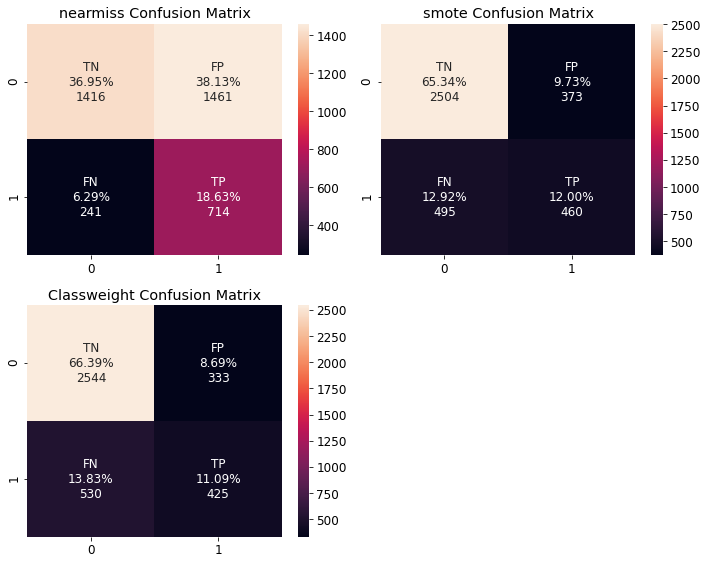

In [78]:
models = [nearmiss, smote]
score = []
count = 0
fig = plt.figure(figsize=(10,8))

for i,j in zip(models,['nearmiss', 'smote']):
    estimator= Pipeline([
        ('preprocess', transformer),
        ('resampling', i),
        ('model',model)
         ])
    estimator.fit(x_train,y_train)
    y_pred=estimator.predict(x_test)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score.append(roc_auc_score(y_test,y_predict_proba))
    print(i, roc_auc_score(y_test,y_predict_proba))
    
    count += 1
    cf,labels = confusion_matrix_table(y_test,y_pred)
    ax= plt.subplot(2,2,count)

    plt.rcParams.update({'font.size': 12})
    sns.heatmap(cf, annot=labels, fmt='').set_title(f"{j} Confusion Matrix")
    fig.tight_layout()
    
estimator= Pipeline([
        ('preprocess', transformer),
        ('model',RandomForestClassifier(class_weight='balanced'))
    ])
estimator.fit(x_train,y_train)
y_pred=estimator.predict(x_test)
y_predict_proba = estimator.predict_proba(x_test)[:,1]
score.append(roc_auc_score(y_test,y_predict_proba))

cf,labels = confusion_matrix_table(y_test,y_pred)
ax= plt.subplot(2,2,3)

plt.rcParams.update({'font.size': 12})
sns.heatmap(cf, annot=labels, fmt='').set_title('Classweight Confusion Matrix')
fig.tight_layout()


In [79]:
pd.DataFrame({'model':['Nearmiss','SMOTE','Class Weight'],
             'cv score':cv_score,
             'roc auc score':score}).set_index('model').sort_values(by='cv score',ascending=False)

,cv score,roc auc score
model,,
Class Weight,0.783171,0.783798
SMOTE,0.777531,0.775114
Nearmiss,0.665827,0.651740


## Adjusting treshold

In [80]:
x_train2,x_val,y_train2,y_val=train_test_split(x_train,y_train,stratify=y_train,test_size=.25,random_state=2020)

In [81]:
y_prob=estimator.fit(x_train2,y_train2)
y_prob_val=estimator.predict_proba(x_val)[:,1]
y_pred=estimator.predict(x_val)

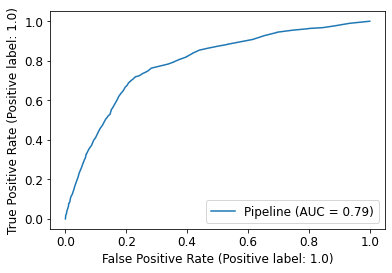

In [82]:
plot_roc_curve(estimator,x_val,y_val)

In [83]:
fpr,tpr,th= roc_curve(y_val,y_prob_val)

# roc_auc_score(y_test,y_pred)
df_treshold = pd.DataFrame({
    "fpr":fpr,
    "tpr":tpr,
    "th":th
})
df_treshold_filtered = df_treshold[(df_treshold['fpr']>=0.21) & (df_treshold['fpr']<=0.27)]
df_treshold_filtered['ratio'] = df_treshold_filtered['tpr']/df_treshold_filtered['fpr']
df_treshold_filtered.sort_values('ratio',ascending=False)

,fpr,tpr,th,ratio
104,0.213839,0.697699,0.289242,3.262734
103,0.213839,0.696653,0.290000,3.257843
105,0.221836,0.707113,0.280000,3.187550
106,0.230529,0.719665,0.270000,3.121806
107,0.231224,0.719665,0.264207,3.112417
108,0.241307,0.723849,0.260000,2.999699
109,0.242350,0.723849,0.251188,2.986787
110,0.253477,0.735356,0.250000,2.901074
111,0.263908,0.742678,0.240000,2.814152


<AxesSubplot:xlabel='fpr', ylabel='tpr'>

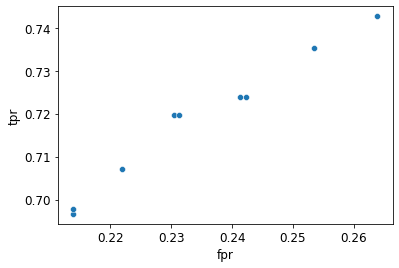

In [84]:
sns.scatterplot(data=df_treshold_filtered, x='fpr', y='tpr')

In [85]:
th1 = df_treshold_filtered.loc[105][2]
th1

0.28

In [86]:
y_pred = np.where(y_predict_proba>th1,1,0)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_predict_proba))

              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83      2877
         1.0       0.51      0.71      0.59       955

    accuracy                           0.76      3832
   macro avg       0.70      0.74      0.71      3832
weighted avg       0.79      0.76      0.77      3832

0.7837978406098557


# Model Tunning

In [87]:
estimator.get_params()

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot', OneHotEncoder(),
                                    ['gender', 'company_type', 'major_discipline',
                                     'enrolled_university']),
                                   ('ordinal',
                                    OrdinalEncoder(mapping=[{'col': 'relevent_experience',
                                                             'mapping': {'Has relevent experience': 1,
                                                                         'No relevent experience': 0}},
                                                            {'col': 'education_level',
                                                             'mapping': {'Graduate': 2,
                                                                         'High School': 1,
                                                                         'Masters...
       

In [88]:
hyperparam_space={
    'model__n_estimators':[75],
    'model__max_features':['auto','sqrt','log2'],
    'model__max_depth':[None,2,4],
    'model__min_samples_split':[5,7,9,11],
    'model__min_samples_leaf':[2,3,4,7],
    'model__bootstrap':[True,False],
    'model__class_weight': ['balanced','balanced_subsample'],
    'model__criterion':['gini','entropy']
}

In [89]:
skfold=StratifiedKFold(n_splits=5)
grid_search=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='roc_auc',
    n_jobs=-1
)

In [90]:
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8012745295010728
{'model__bootstrap': True, 'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'auto', 'model__min_samples_leaf': 7, 'model__min_samples_split': 9, 'model__n_estimators': 75}


0.798624403328802


<Figure size 360x288 with 0 Axes>

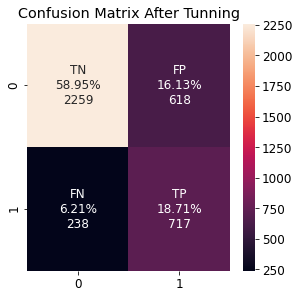

In [91]:
# Score after tunning
best_model=grid_search.best_estimator_
best_model.fit(x_train, y_train)
y_predict_proba = best_model.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test,y_predict_proba))

fig = plt.figure(figsize=(5,4))

y_pred = best_model.predict(x_test)

cf,labels = confusion_matrix_table(y_test,y_pred)

plt.figure(figsize=(10,10))
ax= plt.subplot(2,2,count)
plt.rcParams.update({'font.size': 12})
sns.heatmap(cf, annot=labels, fmt='').set_title(f"Confusion Matrix After Tunning")
fig.tight_layout()

After model tunning, test score increase from 0.783 to 0.796

In [92]:
best_model=grid_search.best_estimator_
best_model.fit(x_train, y_train)
y_pred_tunning = best_model.predict(x_test)
print(classification_report(y_test,y_pred_tunning))

              precision    recall  f1-score   support

         0.0       0.90      0.78      0.84      2877
         1.0       0.54      0.75      0.63       955

    accuracy                           0.78      3832
   macro avg       0.72      0.77      0.73      3832
weighted avg       0.81      0.78      0.79      3832



## Feature Selection

In [93]:
x_train_preprocessed = transformer.fit_transform(x_train)
model = RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= None,
                            max_features= 'sqrt', min_samples_leaf= 7, min_samples_split= 9,
                            n_estimators= 75, class_weight='balanced')
rfe = RFE(model)

rfe.fit(x_train_preprocessed,y_train)
features_select=pd.DataFrame({'select':rfe.support_},index=estimator.named_steps["preprocess"].get_feature_names())
features_select[features_select['select']==True]

,select
onehot__x0_Male,True
onehot__x1_No Employment,True
onehot__x1_Not provided,True
onehot__x1_Pvt Ltd,True
onehot__x2_No Major,True
onehot__x3_Full time course,True
onehot__x3_No enrollment,True
ordinal__relevent_experience,True
ordinal__education_level,True
ordinal__experience,True


In [94]:
x_test_preprocessed = transformer.transform(x_test)
x_train_select = pd.DataFrame(rfe.transform(x_train_preprocessed),columns=features_select[features_select['select']==True].index)
x_test_select = pd.DataFrame(rfe.transform(x_test_preprocessed),columns=features_select[features_select['select']==True].index)

model.fit(x_train_select,y_train)
y_predict_proba = model.predict_proba(x_test_select)[:,1]
print(roc_auc_score(y_test,y_predict_proba))

0.7985599819474547


Setelah menggunakan RFE, didapat fitur-fitur yang dianggap paling penting. Kemudian dilakukan modeling menggunakan fitur tersebut didapat test score yang naik secara tidak signifikan dari 0.7976 ke 0.7991. Sehingga, diputuskan untuk menggunakan feature selection untuk memudahkan interpretasi data.

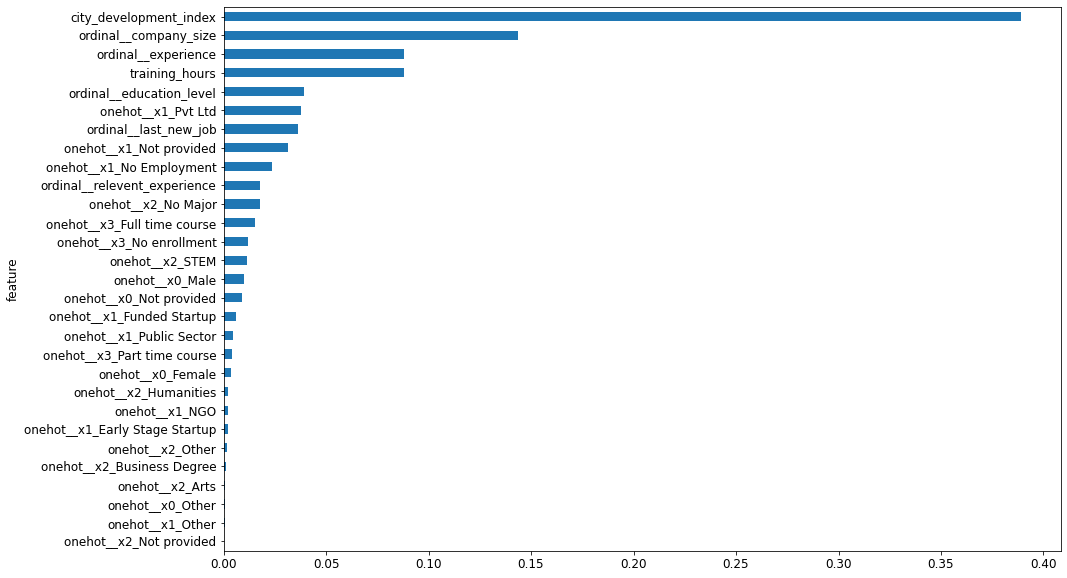

In [95]:
feature_names = estimator.named_steps["preprocess"].get_feature_names()
coefs = best_model.named_steps["model"].feature_importances_
zipped = zip(feature_names, coefs)
df1 = pd.DataFrame(zipped, columns=["feature", "value"])
ax = df1.set_index('feature')['value'].sort_values().plot(kind='barh',figsize=(15,10))

In [96]:
df1.sort_values(by='value',ascending=False).reset_index()

,index,feature,value
0,27,city_development_index,0.388891
1,25,ordinal__company_size,0.143557
2,24,ordinal__experience,0.088090
3,28,training_hours,0.088057
4,23,ordinal__education_level,0.039289
5,11,onehot__x1_Pvt Ltd,0.037691
6,26,ordinal__last_new_job,0.036190
7,8,onehot__x1_Not provided,0.031190
8,7,onehot__x1_No Employment,0.023631
9,22,ordinal__relevent_experience,0.017693


***
x0 : gender (11,13,14,22)  
x1 : company_type (7,9,15,16,18,19,25)  
x2 : major_discipline (10,12,17,20,21,23,24)



# Conclusion and Recommendation

In [97]:
import shap
shap.initjs()

In [98]:
x_train_preprocessed = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names())
x_test_preprocessed = pd.DataFrame(transformer.transform(x_test),columns=transformer.get_feature_names())

In [99]:
explainer = shap.TreeExplainer(xgb)
chosen_instance = x_test_preprocessed.iloc[[0]]
shap_values = explainer.shap_values(chosen_instance)

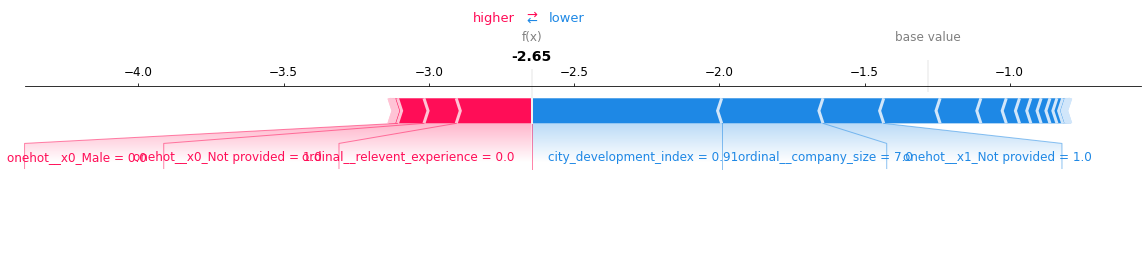

In [100]:
shap.force_plot(explainer.expected_value, shap_values[0], chosen_instance, matplotlib=True)